In [1]:
#preriquisites
!pip install -q kaggle

**Kaggle** **API**

Using Kaggle's beta API, you can interact with Competitions and Datasets to download data, make submissions, and more via the command line.

> Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

#Download Data

In [6]:
!kaggle datasets download -d 'prasunroy/synthetic-digits'

100% 231M/232M [00:02<00:00, 85.7MB/s]
100% 232M/232M [00:02<00:00, 88.7MB/s]


In [ ]:
!unzip synthetic-digits.zip -d synthetic-digits

In [8]:
!mkdir processed_data

In [9]:
!chmod 600 processed_data

In [10]:
!chmod 600 /content/synthetic-digits/synthetic_digits/imgs_train

In [ ]:
!ls /content/synthetic-digits/synthetic_digits/imgs_train

#Synthetic MNIST
Synthetic MNIST is a variation of MNIST contains handwritten characters of color images & background images.
Data is present in Kaggle


In [12]:
#os module is a library of Operating system file utilities
#PIL is a Image processing library
#sklearn is the scikit learning library matplotlib has many plotting capabilities

import numpy as np
import os
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
#modelu is used to split the data into train/test dataset at  a particular ratio

from keras.models import Sequential

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import LeakyReLU

import matplotlib.pylab as plt

In [13]:
#input image dimentions
dimen=28
num_channels = 3

#Data Converter

Data Converter Iterates into the Kaggle data, preprocesses the images and stores pre-processed images into four files

Kaggle store info in directory structure.Name of the directory is the name of the class.withing each dir we will have the no of samples needed for training or testing


*   dir_path ="/content/synthetic-digits/synthetic-digits/imgs_train" contains all required samples
*   output_path = "/content/processed_data" - will place the processed data here

**Process** :

1.  Iterate through the directory (dir_path)
2.  Find the sub directories
1.  The sub directories become label for the particular class
2.  Read all images from the files and append to array (image)
1.  convert y value into categorical variables
2.  split data into train(75%) or test (25%)
1.  Instead of looping through the files everytime convert to '.npy' file and save. Use these files from now on


Data Files -> Array
Y -> categorical variable

train_test_split randomly splits the input data into train and test



In [14]:
dir_path ="/content/synthetic-digits/synthetic_digits/imgs_train"
output_path = "/content/processed_data/"


In [15]:

sub_dir_list = os.listdir( dir_path )
images = list()
labels = list()
for i in range( len( sub_dir_list)):
  label = 1
  print(label)
  image_names = os.listdir( dir_path +"/"+ sub_dir_list[i] )
  for image_path in image_names:
    path = dir_path + "/" + sub_dir_list[i] + "/" + image_path
    try:
      image = Image.open(path)
      resize_image = image.resize((dimen, dimen)) #resizing images of different resolution to 28 * 28
      array = list()
      for x in range(dimen):
        sub_array = list()
        for y in range(dimen):
          sub_array.append(image.load()[x,y])
        array.append(sub_array)
      image_data = np.array(array)
      image = np.array(np.reshape(image_data, (dimen, dimen, num_channels))) / 255
      images.append(image)
      labels.append(label)
    except OSError:
      print( "WARNING : File at {} is not an valid image.".format( path))

x = np.array( images )
y = np.array( keras.utils.to_categorical( np.array( labels) , num_classes=len(sub_dir_list)))

train_features , test_features , train_labels , test_labels = train_test_split( x, y, test_size=0.25 )

np.save('{}x.npy'.format( output_path) , train_features )
np.save('{}y.npy'.format( output_path) , train_labels )
np.save('{}test_x.npy'.format( output_path) , test_features )
np.save('{}test_y.npy'.format( output_path) , test_labels )

print('Data processed')

1
1
1
1
1
1
1
1
1
1
Data processed


In [16]:
print(dir_path)
print(sub_dir_list[0] )
print(image_path)

/content/synthetic-digits/synthetic_digits/imgs_train
2
5_00961.jpg


In [ ]:
#block testing -  error testing
"""print(path)
image = Image.open(path)
resize_image = image.resize((dimen, dimen))

array = list()
for x in range(dimen):
  sub_array = list()
  for y in range(dimen):
    sub_array.append(image.load()[x,y])
  array.append(sub_array)
image_data = np.array(array)
image = np.array(np.reshape(image_data, (dimen, dimen, num_channels))) / 255
images.append(image)
labels.append(label)"""

In [17]:
X = np.load('processed_data/x.npy')
Y = np.load('processed_data/y.npy')
test_X = np.load('processed_data/test_x.npy')
test_Y = np.load('processed_data/test_y.npy')

print(X.shape)
print(Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7500, 28, 28, 3)
(7500, 10)
(2500, 28, 28, 3)
(2500, 10)


#Pre-processing the data

In [18]:
X = X.reshape((X.shape[0] , dimen**2 * num_channels )).astype(np.float32)
test_X = test_X.reshape((test_X.shape[0], dimen**2 * num_channels )).astype(np.float32)

In [19]:
print(X.shape)
print(Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7500, 2352)
(7500, 10)
(2500, 2352)
(2500, 10)


#Define hyper-parameters

In [20]:
input_shape = (dimen * dimen * num_channels, )
convolution_shape = ( dimen, dimen, num_channels )
kernel_size_1 = (4,4)
kernel_size_2 = (3,3)
pool_size_1 = (3,3)
pool_size_2 = (2,2)

dropout_rate = 0.5
number_of_classes = 10
 # 0 to 9 classes

batch_size = 120
epochs = 100

leaky_relu_alpha = 0.05

#Define baseline model

In [21]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
# define cnn model
def baseline_model():
  model = Sequential()
  model.add(Reshape( input_shape=input_shape , target_shape=convolution_shape))
  #block1
  model.add(Conv2D(32, kernel_size=kernel_size_1))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(Conv2D(32, kernel_size=kernel_size_1))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(Conv2D(32, kernel_size=kernel_size_1))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(MaxPooling2D(pool_size_1))

  #block2
  model.add(Conv2D(64, kernel_size_2))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(Conv2D(64, kernel_size_2))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(MaxPooling2D(pool_size_2))
  #Dense layer
  model.add(Flatten())
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=leaky_relu_alpha))
  model.add(Dropout(dropout_rate))

  model.add(Dense(number_of_classes, activation='softmax'))
  # compile model
  opt = keras.optimizers.Adam(learning_rate=0.001, epsilon=0.0001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  #model_log=model.fit(X, Y, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(test_X, test_Y))
  return model


#Model training

In [22]:
model = baseline_model()
model_log = model.fit(X, Y, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(test_X, test_Y))

Epoch 1/100
63/63 [==============================] - 13s 21ms/step - loss: 0.1905 - accuracy: 0.9715 - val_loss: 1.1444e-09 - val_accuracy: 1.0000
Epoch 2/100
63/63 [==============================] - 1s 10ms/step - loss: 1.0407e-07 - accuracy: 1.0000 - val_loss: 8.5831e-10 - val_accuracy: 1.0000
Epoch 3/100
63/63 [==============================] - 1s 10ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 3.0518e-09 - val_accuracy: 1.0000
Epoch 4/100
63/63 [==============================] - 1s 11ms/step - loss: 1.7060e-07 - accuracy: 1.0000 - val_loss: 3.0041e-09 - val_accuracy: 1.0000
Epoch 5/100
63/63 [==============================] - 1s 11ms/step - loss: 1.1591e-05 - accuracy: 1.0000 - val_loss: 2.2888e-09 - val_accuracy: 1.0000
Epoch 6/100
63/63 [==============================] - 1s 11ms/step - loss: 5.8505e-08 - accuracy: 1.0000 - val_loss: 1.5259e-09 - val_accuracy: 1.0000
Epoch 7/100
63/63 [==============================] - 1s 13ms/step - loss: 1.0710e-06 - accuracy: 1.0000 - v

#Evaluate Model

In [26]:
# evaluate a model
def evaluate_model(model,model_log):
	print('Train loss:', model_log.history['loss'][-1])
	print('Train accuracy:', model_log.history['accuracy'][-1])

	print('Test loss:', model_log.history['val_loss'][-1])
	print('Test accuracy:', model_log.history['val_accuracy'][-1])

	# plot accuracy
	plt.subplot(2, 1, 1)
	plt.plot(range(1,101),model_log.history['accuracy'])
	plt.plot(range(1,101),model_log.history['val_accuracy'])
	plt.title('Model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train','test'],loc='lower right')
	# plot loss
	plt.subplot(2, 1, 2)
	plt.plot(range(1,101),model_log.history['loss'])
	plt.plot(range(1,101),model_log.history['val_loss'])
	plt.title('Model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train','test'],loc='upper right')

	plt.tight_layout()
	return

#If the graphs are similar for both train and test data, it
#is an indication no overfitting of train data

Train loss: 1.6212429176931664e-09
Train accuracy: 1.0
Test loss: 0.0
Test accuracy: 1.0


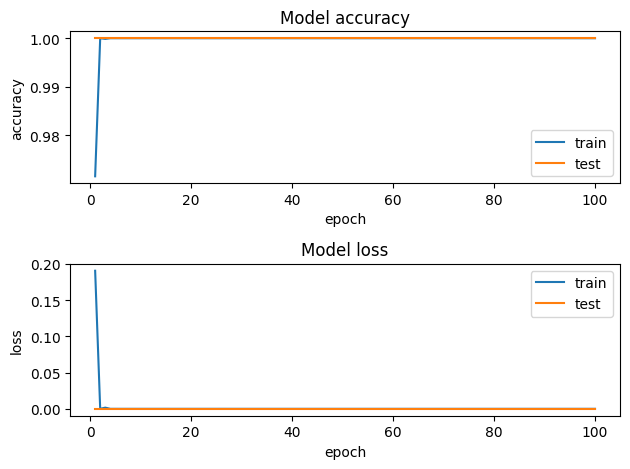

In [27]:
evaluate_model(model, model_log)

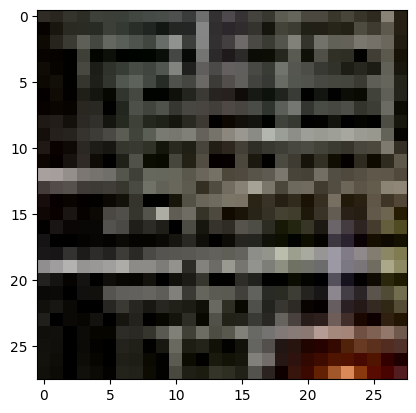

In [63]:
plt.imshow(test_X[2].reshape(convolution_shape))

In [43]:
print(input_shape)

(2352,)


In [64]:
testX0 = test_X[0].reshape(-1,28,28)
print(X.shape)
print(Y.shape)
print(test_X.shape)
print(test_X[2].reshape(convolution_shape).shape)
print(test_Y.shape)

(7500, 2352)
(7500, 10)
(2500, 2352)
(28, 28, 3)
(2500, 10)


In [ ]:
prediction = model.predict(test_X[2].reshape(convolution_shape))

In [ ]:
from numpy import argmax
testX0 = test_X[2].reshape(convolution_shape)
prediction = model.predict(testX0)

#generate arg maxes for prediction
predicted_class = argmax(prediction)
print(predicted_class)